In [1]:
import pandas as pd
import torch
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from sklearn.preprocessing import MinMaxScaler


sys.path.append("../../../")
from src.architectures.lstm.classifier import LSTMClassifier
from src.architectures.lstm.autoencoder import LSTMAutoEncoder
from src.dataset import ExerciseDataset
from src.trainer import Trainer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.manual_seed(0)

In [3]:
squat_angles_df = pd.read_csv("../../../data/dct/squat.csv")

squat_angles_df.head()

,rep,frame,x,y,z,joint_name,label
0,1,0,0.006386,0.263329,2.062893,nose,correct
1,1,1,0.018464,0.038602,-0.023428,nose,correct
2,1,2,0.010405,0.125355,-0.056878,nose,correct
3,1,3,0.010309,-0.002697,-0.005694,nose,correct
4,1,4,-0.035405,0.009693,-0.015210,nose,correct


In [4]:
squat_angles_dataset = ExerciseDataset(squat_angles_df, representation="dct")
dataset_length = len(squat_angles_dataset)

In [5]:
train_squat_angles_dataset, val_squat_angles_dataset = random_split(
    squat_angles_dataset,
    [int(0.80 * dataset_length), dataset_length - int(0.80 * dataset_length)],
    generator,
)

In [6]:
batch_size = 4

train_squat_angles_dl = DataLoader(
    train_squat_angles_dataset,
    batch_size=batch_size,
    shuffle=True,
)

val_squat_angles_dl = DataLoader(
    val_squat_angles_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [7]:
NUM_ANGLES = 6
NUM_JOINTS = 15

LATENT_SIZE = 256
NUM_LAYERS = 2
HIDDEN_SIZE = 128

In [8]:
angles_lstm_autoencoder = LSTMAutoEncoder(
    NUM_JOINTS * 3, HIDDEN_SIZE, LATENT_SIZE, NUM_LAYERS
)
loss_fn = torch.nn.MSELoss(reduction="sum")
lr = 0.002
optimizer = torch.optim.Adam(angles_lstm_autoencoder.parameters(), lr)

In [9]:
trainer = Trainer(
    angles_lstm_autoencoder,
    train_squat_angles_dl,
    val_squat_angles_dl,
    loss_fn,
    optimizer,
    device,
)
results = trainer.train_autoencoder(
    num_epochs=350, weights_path="../../../models/dct_lstm_autoencoder.pt"
)

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:00<00:00, 45.04it/s]

2024-04-09 14:47:56,931: INFO     Epoch 1/350: Train Loss: 3762.908134460449



100%|██████████| 27/27 [00:00<00:00, 58.92it/s]

2024-04-09 14:48:01,864: INFO     Epoch 11/350: Train Loss: 170.51855564117432



100%|██████████| 27/27 [00:00<00:00, 54.98it/s]

2024-04-09 14:48:06,869: INFO     Epoch 21/350: Train Loss: 153.03723335266113



100%|██████████| 27/27 [00:00<00:00, 55.19it/s]

2024-04-09 14:48:11,984: INFO     Epoch 31/350: Train Loss: 120.96441775560379



100%|██████████| 27/27 [00:00<00:00, 56.29it/s]

2024-04-09 14:48:17,341: INFO     Epoch 41/350: Train Loss: 98.98093891143799



100%|██████████| 27/27 [00:00<00:00, 52.79it/s]

2024-04-09 14:48:22,574: INFO     Epoch 51/350: Train Loss: 75.17650973796844



100%|██████████| 27/27 [00:00<00:00, 56.46it/s]

2024-04-09 14:48:27,854: INFO     Epoch 61/350: Train Loss: 52.593477696180344



100%|██████████| 27/27 [00:00<00:00, 51.82it/s]

2024-04-09 14:48:32,961: INFO     Epoch 71/350: Train Loss: 40.300581604242325



100%|██████████| 27/27 [00:00<00:00, 38.54it/s]

2024-04-09 14:48:38,988: INFO     Epoch 81/350: Train Loss: 32.41931241750717



100%|██████████| 27/27 [00:00<00:00, 53.38it/s]

2024-04-09 14:48:44,490: INFO     Epoch 91/350: Train Loss: 27.819480687379837



100%|██████████| 27/27 [00:00<00:00, 46.70it/s]

2024-04-09 14:48:50,814: INFO     Epoch 101/350: Train Loss: 24.9970663189888



100%|██████████| 27/27 [00:00<00:00, 49.35it/s]

2024-04-09 14:48:56,164: INFO     Epoch 111/350: Train Loss: 27.832906365394592



100%|██████████| 27/27 [00:00<00:00, 52.86it/s]

2024-04-09 14:49:01,307: INFO     Epoch 121/350: Train Loss: 39.73728197813034



100%|██████████| 27/27 [00:00<00:00, 51.49it/s]

2024-04-09 14:49:06,356: INFO     Epoch 131/350: Train Loss: 14.33446342498064



100%|██████████| 27/27 [00:00<00:00, 56.58it/s]

2024-04-09 14:49:11,450: INFO     Epoch 141/350: Train Loss: 12.554011657834053



100%|██████████| 27/27 [00:00<00:00, 55.96it/s]

2024-04-09 14:49:16,325: INFO     Epoch 151/350: Train Loss: 91.26084315776825



100%|██████████| 27/27 [00:00<00:00, 42.66it/s]

2024-04-09 14:49:22,504: INFO     Epoch 161/350: Train Loss: 18.092872232198715



100%|██████████| 27/27 [00:00<00:00, 48.68it/s]

2024-04-09 14:49:28,649: INFO     Epoch 171/350: Train Loss: 12.248622670769691



100%|██████████| 27/27 [00:00<00:00, 48.23it/s]

2024-04-09 14:49:34,022: INFO     Epoch 181/350: Train Loss: 9.483261972665787



100%|██████████| 27/27 [00:00<00:00, 47.25it/s]

2024-04-09 14:49:39,189: INFO     Epoch 191/350: Train Loss: 9.98164975643158



100%|██████████| 27/27 [00:00<00:00, 46.78it/s]

2024-04-09 14:49:44,635: INFO     Epoch 201/350: Train Loss: 8.44886976480484



100%|██████████| 27/27 [00:00<00:00, 49.19it/s]

2024-04-09 14:49:50,284: INFO     Epoch 211/350: Train Loss: 28.186842128634453



100%|██████████| 27/27 [00:00<00:00, 51.37it/s]

2024-04-09 14:49:57,280: INFO     Epoch 221/350: Train Loss: 8.215994738042355



100%|██████████| 27/27 [00:00<00:00, 53.84it/s]

2024-04-09 14:50:02,975: INFO     Epoch 231/350: Train Loss: 7.072293274104595



100%|██████████| 27/27 [00:00<00:00, 52.05it/s]

2024-04-09 14:50:08,546: INFO     Epoch 241/350: Train Loss: 4.57204831764102



100%|██████████| 27/27 [00:00<00:00, 60.61it/s]

2024-04-09 14:50:13,470: INFO     Epoch 251/350: Train Loss: 6.216011334210634



100%|██████████| 27/27 [00:00<00:00, 45.25it/s]

2024-04-09 14:50:18,467: INFO     Epoch 261/350: Train Loss: 33.02840480208397



100%|██████████| 27/27 [00:00<00:00, 52.96it/s]

2024-04-09 14:50:23,508: INFO     Epoch 271/350: Train Loss: 16.741864025592804



100%|██████████| 27/27 [00:00<00:00, 36.76it/s]

2024-04-09 14:50:28,856: INFO     Epoch 281/350: Train Loss: 5.883700825273991



100%|██████████| 27/27 [00:00<00:00, 58.27it/s]

2024-04-09 14:50:33,943: INFO     Epoch 291/350: Train Loss: 4.883019687607884



100%|██████████| 27/27 [00:00<00:00, 50.41it/s]

2024-04-09 14:50:39,108: INFO     Epoch 301/350: Train Loss: 7.875744268298149



100%|██████████| 27/27 [00:00<00:00, 50.10it/s]

2024-04-09 14:50:44,754: INFO     Epoch 311/350: Train Loss: 3.6083554923534393



100%|██████████| 27/27 [00:00<00:00, 52.49it/s]

2024-04-09 14:50:49,989: INFO     Epoch 321/350: Train Loss: 4.102817788720131



100%|██████████| 27/27 [00:00<00:00, 54.25it/s]

2024-04-09 14:50:55,071: INFO     Epoch 331/350: Train Loss: 3.601629428565502



100%|██████████| 27/27 [00:00<00:00, 50.75it/s]

2024-04-09 14:51:00,085: INFO     Epoch 341/350: Train Loss: 39.872797667980194



100%|██████████| 27/27 [00:00<00:00, 49.94it/s]

2024-04-09 14:51:05,312: INFO     Best model saved in ../../../models/dct_lstm_autoencoder.pt


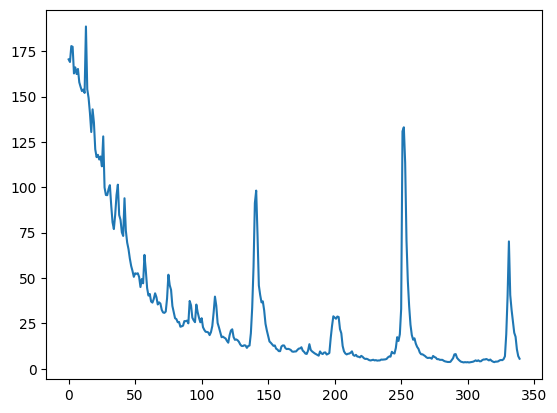

In [14]:
plt.plot([result["train_loss"] for result in results[10:]], label="train")

In [15]:
angles_lstm_autoencoder.load_state_dict(
    torch.load(
        "../../../models/dct_lstm_autoencoder.pt", map_location=torch.device("cpu")
    )
)

<All keys matched successfully>

Text(0.5, 1.0, 'decoded signal')

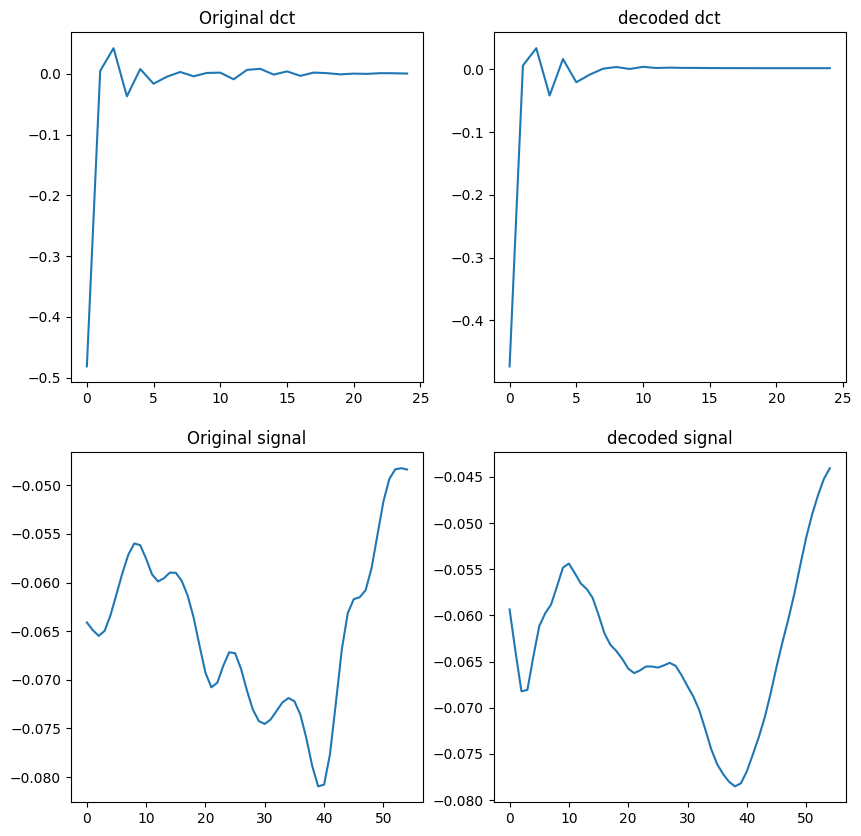

In [16]:
import numpy as np
from scipy.fft import idct

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
dl_iter = iter(train_squat_angles_dl)
X, _ = next(dl_iter)
X = X[1].to(device).unsqueeze(0)
X_hat = angles_lstm_autoencoder(X)

axes[0][0].plot(X.squeeze().detach().numpy()[:, 30])
axes[0][0].set_title("Original dct")

original_signal = X.squeeze()[:, 30]
x_dct = np.zeros(55, dtype=float)
x_dct[:25] = original_signal
original_signal = idct(x_dct, norm="ortho")

axes[1][0].plot(original_signal)
axes[1][0].set_title("Original signal")

axes[0][1].plot(X_hat.squeeze().detach().numpy()[:, 30])
axes[0][1].set_title("decoded dct")

new_signal = X_hat.squeeze().detach().numpy()[:, 30]
x_dct = np.zeros(55, dtype=float)
x_dct[:25] = new_signal
new_signal = idct(x_dct, norm="ortho")

axes[1][1].plot(new_signal)
axes[1][1].set_title("decoded signal")

In [18]:
(X - X_hat).sum()

tensor(0.0812, grad_fn=<SumBackward0>)